In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import pylab as pl
import geopandas as gp
from geopandas import GeoDataFrame
import scipy.stats
import zipfile
import shapely
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using sensor data from devices deployed in NYC and correlative data available from NYC Open Data,
your assignment is to identify patterns and anomalies in environmental data, and find potential causal
relationships between these indicators and the built environment. Air quality (particulate matter) and
noise data have been posted to NYUClasses, along with locations of the devices taking the readings. 

In [3]:
sensor = pd.read_csv('LuxDustNoise_summarized_4hour_0719.csv')

1. Clean and plot the data for the individual sensors provided;
2. Describe the daily patterns that emerge;
3. Identify anomalous activity;
4. Link the sensor data back to city administrative records to identify possible correlations or
causal relationships.
-For air quality, you should examine the correlation between particular matter concentrations
and temperature, humidity, and land use.
-For noise, you should analyze the relationship (If any) between noise level readings, 311
complaints about noise, and land use.

In [4]:
sensor.head()

,dt,sensor,lux,con,spl
0,2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
1,2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2,2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
3,2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
4,2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


In [5]:
sensor.dt = pd.to_datetime(sensor.dt)

sensor_1 : RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231 

sensor_3 : RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231


sensor_2 : TechLab (at ground level) - 106 Ferris St

sensor_4 : PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231

In [6]:
sensor_1 = sensor[sensor.sensor == 'sensor_0']
sensor_2 = sensor[sensor.sensor == 'sensor_2']
sensor_3 = sensor[sensor.sensor == 'sensor_3']
sensor_4 = sensor[sensor.sensor == 'sensor_4']

sensor data for luminosity (in Lux), particulate concentration (particle count per 0.01 cubic feet), and noise (sound pressure level in dB). The dataset includes readings for four (4) sensors in Red Hook from June 2016. 

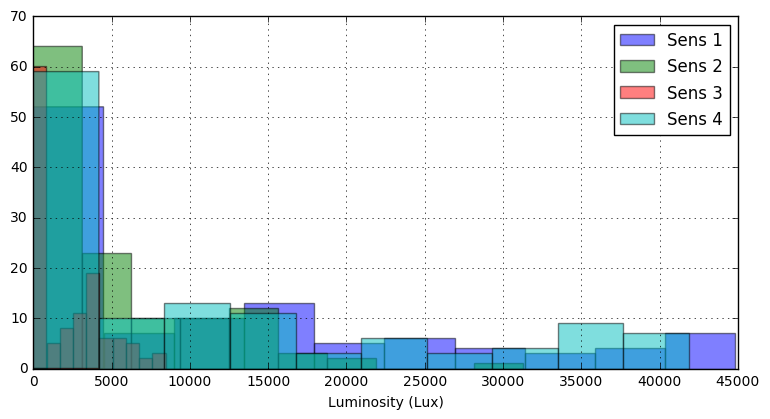

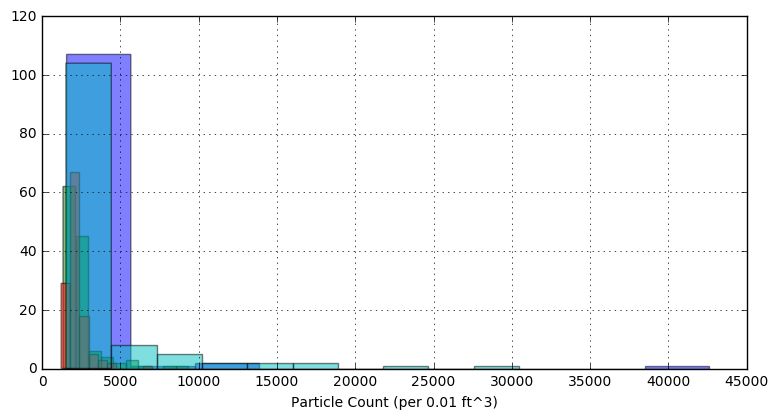

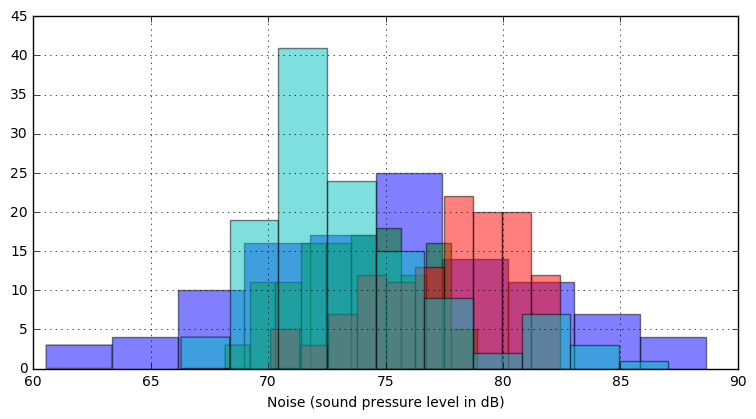

In [7]:
plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['lux'].hist(alpha=.5, label='Sens 1')
sensor_2['lux'].hist(alpha=.5, label='Sens 2')
sensor_3['lux'].hist(alpha=.5, label='Sens 3')
sensor_4['lux'].hist(alpha=.5, label='Sens 4')
plt.xlabel('Luminosity (Lux)')
plt.legend()

plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['con'].hist(alpha=.5, label='Sens 1')
sensor_2['con'].hist(alpha=.5, label='Sens 2')
sensor_3['con'].hist(alpha=.5, label='Sens 3')
sensor_4['con'].hist(alpha=.5, label='Sens 4')
plt.xlabel('Particle Count (per 0.01 ft^3)')

plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['spl'].hist(alpha=.5, label='Sens 1')
sensor_2['spl'].hist(alpha=.5, label='Sens 2')
sensor_3['spl'].hist(alpha=.5, label='Sens 3')
sensor_4['spl'].hist(alpha=.5, label='Sens 4')
plt.xlabel("Noise (sound pressure level in dB)")

### Figure 1: Luminosity, Air Quality, and Noise distribution of data collected from four sensors located in Redhook.
Meausurements were taken once every four hours between June 21, 2016 and July 12, 2016.  Sensor 1 and 3 are both located at the Redhook Initiative, at the corner of Hicks and W 9th streets. Sensor 1 is positioned on the roof at an elevation of approximately 8 meters.  Sensor 3 is positioned at the entrace at street level.  Sensor 2 is positioned at the ground level of TechLab at 106 Ferris St and Sensor 4 is on the roof of Pioneerworks (an elevation of 15 meteres) at 159 Pioneer St, Brooklyn, NY 11231.   


In [17]:
print ("Luminosity (Lux) Mean, StDev, N: ", sensor['lux'].mean(), ", ", sensor['lux'].std()\
      , ", ",sensor['lux'].count())
print ("Particle Count (per 0.01 ft^3) Mean, StDev, N: ", sensor['con'].mean(),\
       ", ", sensor['con'].std(), ", ", sensor['con'].count())
print ("Noise (Sound Pressure Level in dB) Mean, StDev, N: ", sensor['spl'].mean(),\
       ", ", sensor['spl'].std(), ", ",sensor['spl'].count())

Luminosity (Lux) Mean, StDev, N:  7472.45729718 ,  10712.6487156 ,  486
Particle Count (per 0.01 ft^3) Mean, StDev, N:  2941.53464185 ,  3010.69794975 ,  486
Noise (Sound Pressure Level in dB) Mean, StDev, N:  74.9948312894 ,  4.31885330329 ,  486


# Normalize sensor data by indexing
Since each variable (luminosity, noice, and air quality) are each measured on four different sensors, each in a different location, the data needs to be normalized to allow for comparisions across the four locations.  To do this, the indexing method was used: each value is divided by the value at the starting date, and then multiplied by 100.
Source: <https://www.dallasfed.org/research/basics/indexing.aspx>

In [13]:
varbls = ['lux', 'con', 'spl']

In [14]:
def indexing_norm (df, l):
    t_0 = df[(l)].mean()
    indexed_values = df[(l)] / t_0
    return indexed_values

In [15]:
for i in varbls:
    sensor_1[(i+'_indx')] = indexing_norm(sensor_1, i)
    sensor_2[(i+'_indx')] = indexing_norm(sensor_2, i)
    sensor_3[(i+'_indx')] = indexing_norm(sensor_3, i)
    sensor_4[(i+'_indx')] = indexing_norm(sensor_4, i)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### Describe the daily patterns that emerge

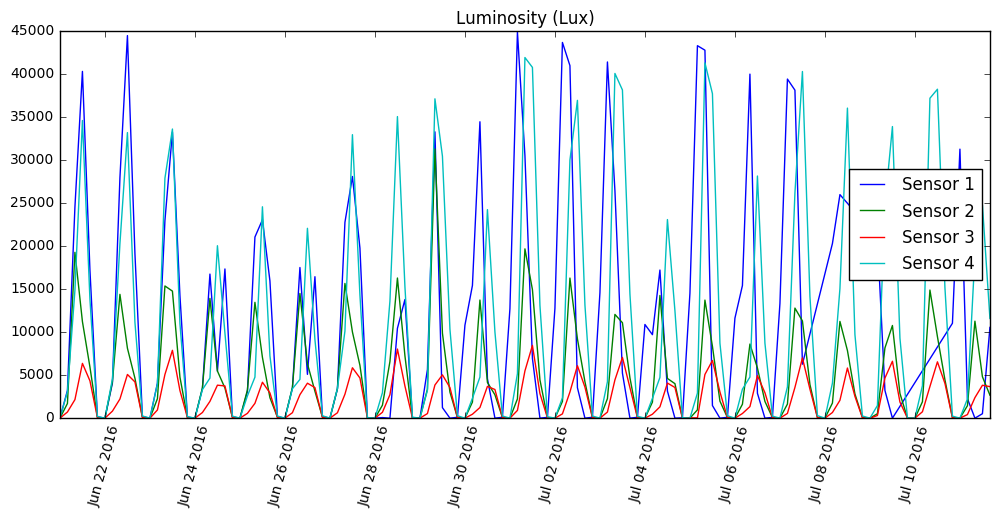

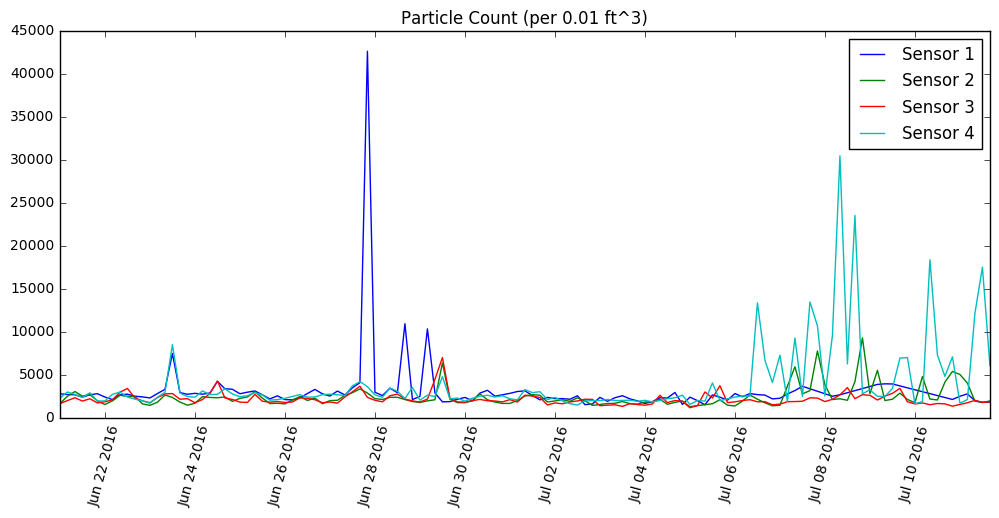

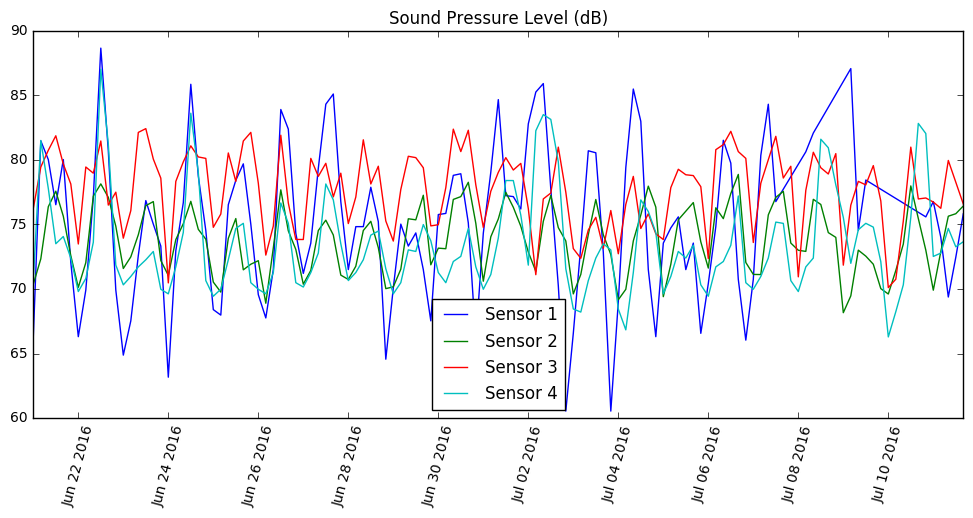

In [18]:
fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['lux'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['lux'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['lux'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['lux'], label=('Sensor 4'))
plt.title('Luminosity (Lux)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['con'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['con'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['con'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['con'], label=('Sensor 4'))
plt.title('Particle Count (per 0.01 ft^3)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['spl'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['spl'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['spl'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['spl'], label=('Sensor 4'))
plt.title('Sound Pressure Level (dB)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

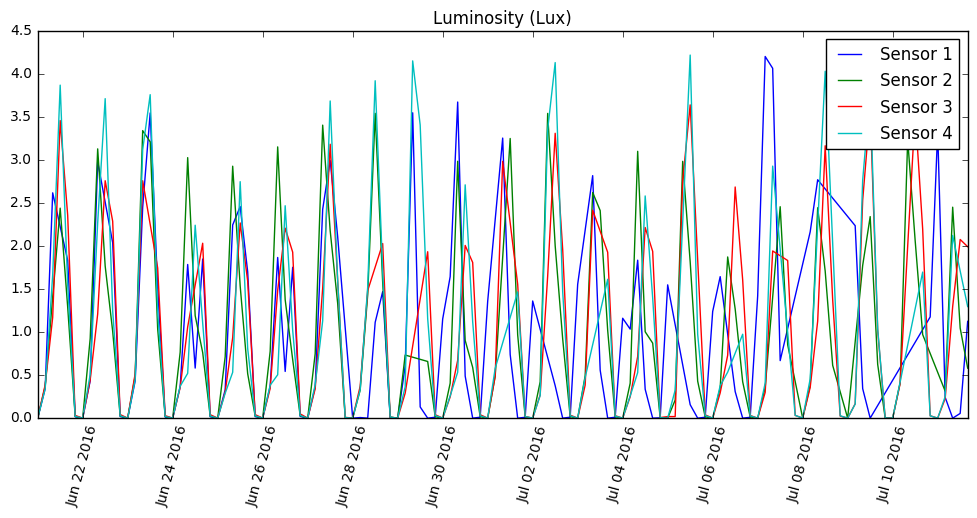

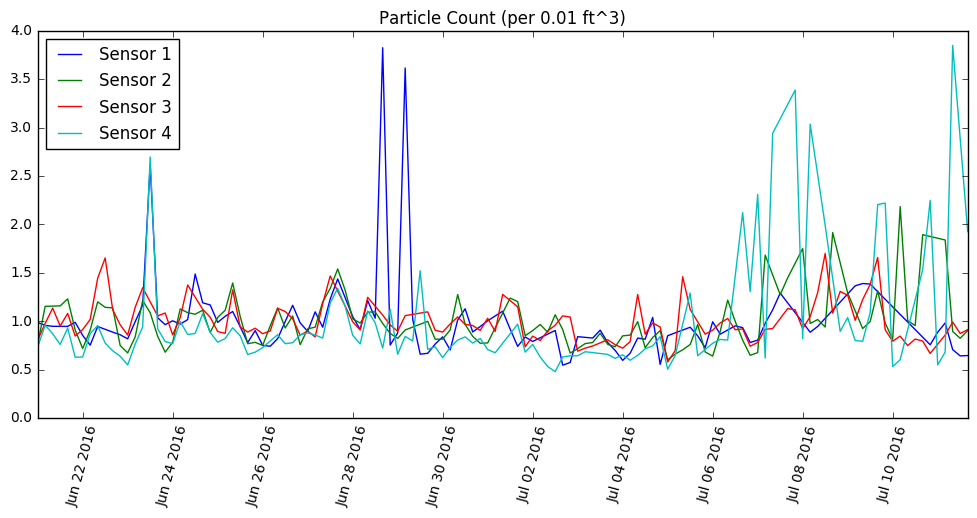

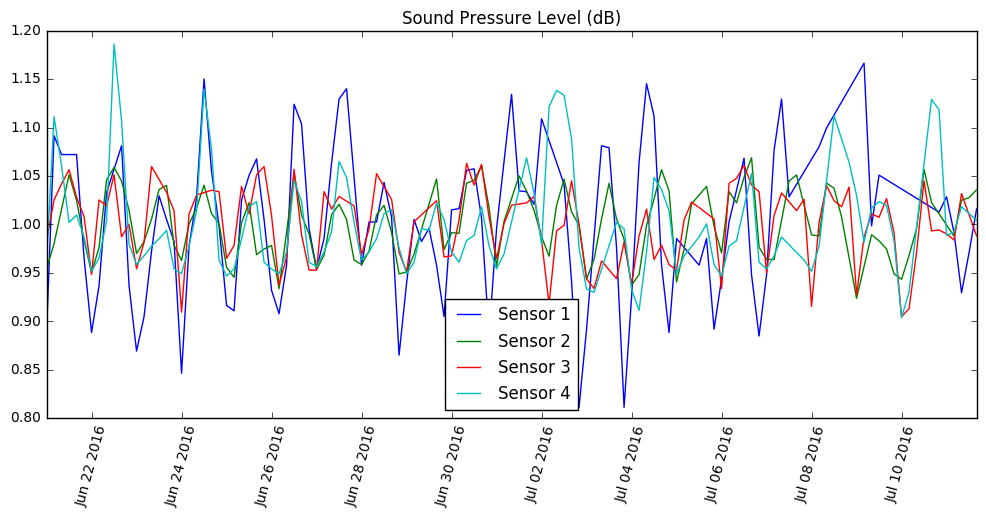

In [239]:
fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['lux_indx'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['lux_indx'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['lux_indx'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['lux_indx'], label=('Sensor 4'))
plt.title('Luminosity (Lux)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['con_indx'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['con_indx'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['con_indx'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['con_indx'], label=('Sensor 4'))
plt.title('Particle Count (per 0.01 ft^3)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['spl_indx'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['spl_indx'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['spl_indx'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['spl_indx'], label=('Sensor 4'))
plt.title('Sound Pressure Level (dB)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

### Figure 2: Daily fluxes are apparant for each variable (luminosity, air quality, and noise) but a btter visualization si required to illusrate the daily patterns more clearly.
Some anamalous activity can been seen in the air quality data. Sensor 1 and sensor both detect out of the ordinary high particple counts on June 23rd (these are the two sensors that are at higher elevations).  Sensor 1 also picks up air quality highs on June 28th.  During the first week of July, all the sensors detect greater particle counts and have greater fluxuations.  Since July 8th was a Friday following Independance Day, the anamolous sound and particle measurements detected then could be explained by celebrations, which would see greater outdoor activity, fireworks, and grilling.

(array([  0.,   5.,  10.,  15.,  20.]), <a list of 5 Text xticklabel objects>)

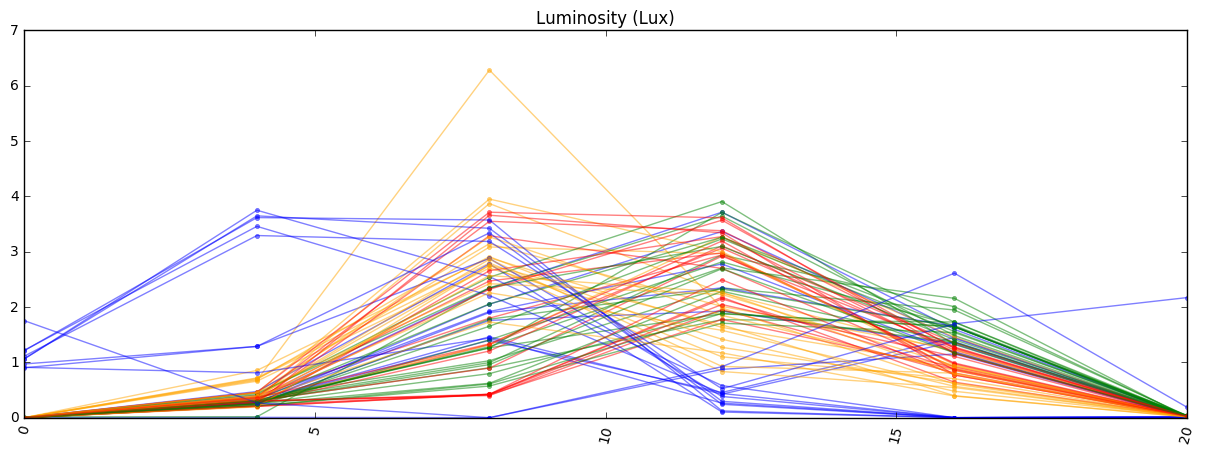

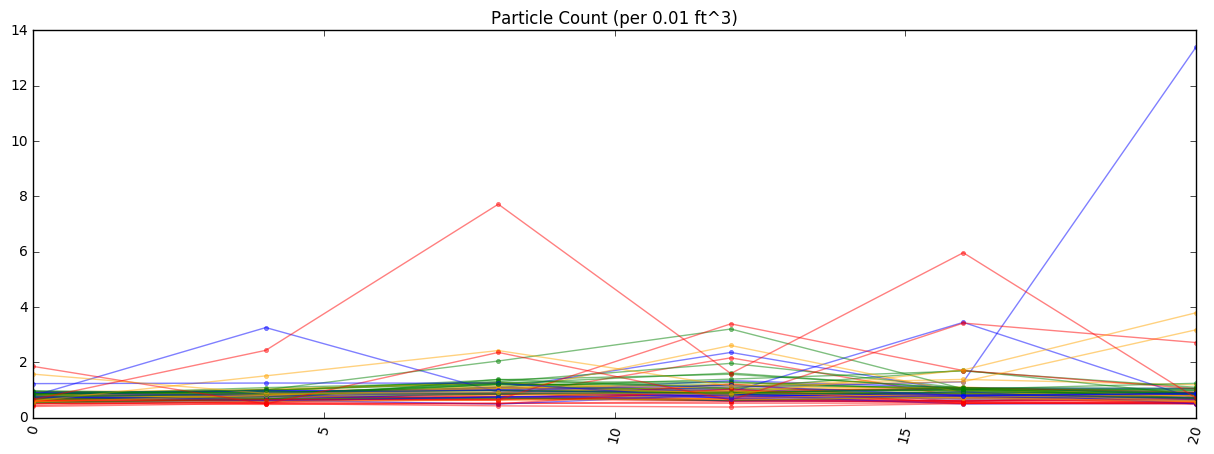

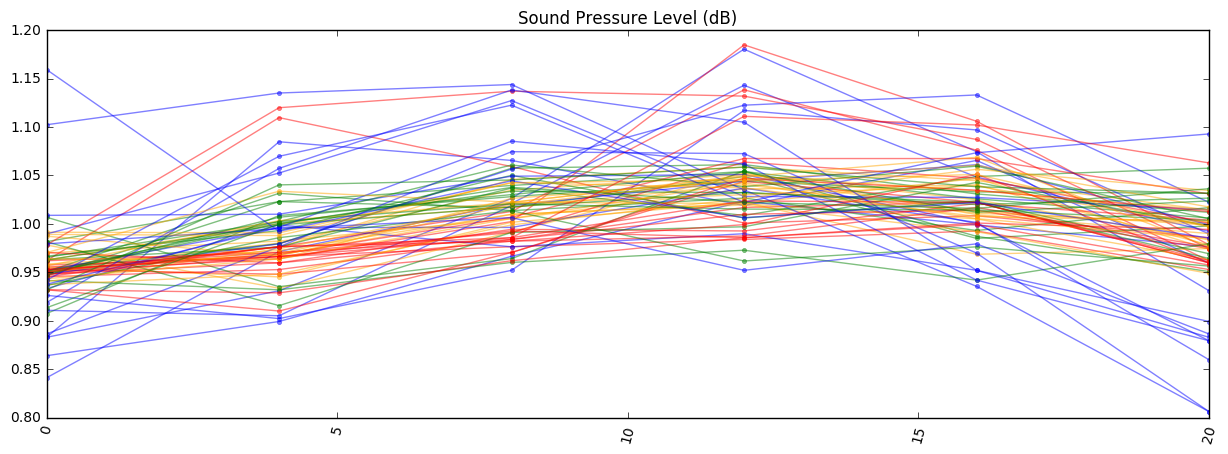

In [20]:
fig = plt.figure(figsize = (15, 5))
start = 0
end = 6
x = [0,4,8,12,16,20]
for i in arange(18):
    y = sensor_1['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 1'), alpha=.5, color = 'b', marker='.', linestyle='-')
    y = sensor_2['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 2'), alpha=.5, color = 'orange', marker='.', linestyle='-')
    y = sensor_3['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 3'), alpha=.5, color = 'g', marker='.', linestyle='-')
    y = sensor_4['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 4'), alpha=.5, color = 'r', marker='.', linestyle='-')
    start += 6
    end += 6
plt.title('Luminosity (Lux)')
plt.xticks(rotation=75, fontsize=10)

fig = plt.figure(figsize = (15, 5))
start = 0
end = 6
x = [0,4,8,12,16,20]
for i in arange(18):
    y = sensor_1['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 1'), alpha=.5,color='b', marker='.', linestyle='-')
    y = sensor_2['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 2'), alpha=.5, color = 'orange', marker='.', linestyle='-')
    y = sensor_3['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 3'), alpha=.5, color = 'g', marker='.', linestyle='-')
    y = sensor_4['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 4'), alpha=.5, color = 'r', marker='.', linestyle='-')
    start += 6
    end += 6
plt.title('Particle Count (per 0.01 ft^3)')
plt.xticks(rotation=75, fontsize=10)

fig = plt.figure(figsize = (15, 5))
start = 0
end = 6
x = [0,4,8,12,16,20]
for i in arange(18):
    y = sensor_1['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 1'), alpha=.5, color = 'b', marker='.', linestyle='-')
    y = sensor_2['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 2'), alpha=.5, color = 'orange', marker='.', linestyle='-')
    y = sensor_3['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 3'), alpha=.5, color = 'g', marker='.', linestyle='-')
    y = sensor_4['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 4'), alpha=.5, color = 'r', marker='.', linestyle='-')
    start += 6
    end += 6
plt.title('Sound Pressure Level (dB)')
plt.xticks(rotation=75, fontsize=10)

### Figure 3: Daily patterns for each sensor for each variable show that light and sound rise through the morning and midday and then decline through the evening.

# !!!! GO BACK AND MAKE EACH SENSOR its own graph
## decribe the daily patterns

# Link with administrative Data

## Air Quality and Temp, Humidity, and landuse

### Download Temp and Humidity data for the locations of each sensorb

In [21]:
#Weather data was scraped from wunderground.com by Avikal Somvanshi <avikal.somvanshi@nyu.edu>
weather = pd.read_csv('weather (1).csv')

In [23]:
weather.dt = pd.to_datetime(weather.dt, dayfirst=True)

In [24]:
weather = weather[((weather.dt >= ('2016-06-21 00:00:00')) & (weather.dt <= ('2016-07-12 23:59:00')))]

### Download Pluto Data

In [25]:
# Downloaded pluto data via filtering on Carto <http://chriswhong.github.io/plutoplus/#>
redhook = gp.read_file('pluto.geojson')

Land Use Codes 
![land use codes](land_use_codes.png)

sensor_0 : RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231
sensor_3 : RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231
sensor_2 : TechLab (at ground level) - 106 Ferris St
sensor_4 : PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231

In [31]:
# Latitude and longitude for each sensor were determined using google maps
sensor_0_pt = shapely.geometry.Point(-74.004545,40.676841) 
sensor_3_pt = shapely.geometry.Point(-74.004545, 40.676841)
sensor_2_pt = shapely.geometry.Point(-74.017157, 40.677955)
sensor_4_pt = shapely.geometry.Point( -74.011799, 40.679188)

In [32]:
redhook = redhook[~redhook.landuse.isnull()]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


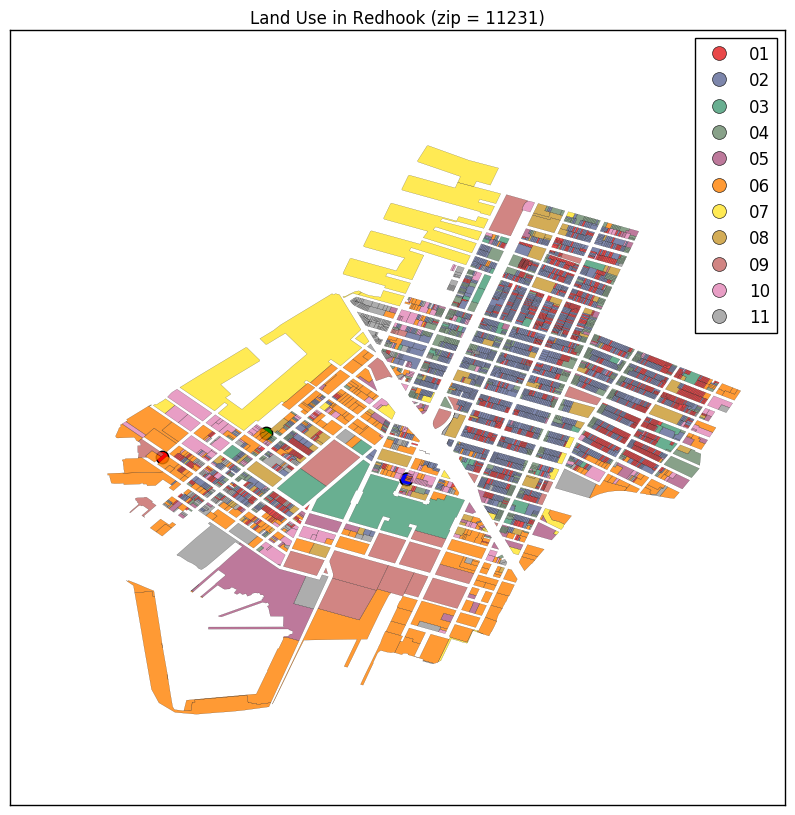

In [36]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
redhook.plot(column='landuse',alpha=.8,linewidth=0.1,ax=ax, legend=True)
ax.legend(loc='best')
ax.scatter(sensor_0_pt.x, sensor_0_pt.y, s=80, c='blue', alpha=1, label='Sensor 1 (elevation = 8m)')
ax.scatter(sensor_2_pt.x, sensor_2_pt.y, s=80, c='red', alpha=1, label='Sensor 2 (ground level)')
ax.scatter(sensor_3_pt.x, sensor_3_pt.y, s=80, c='blue', alpha=1, label='Sensor 3 (street level)')
ax.scatter(sensor_4_pt.x, sensor_4_pt.y, s=80, c='green', alpha=1, label='Sensor 4 (elevation = 15m)')
plt.title("Land Use in Redhook (zip = 11231)")
#ax.legend(loc=1)

### Figure 4: Buildings in Redhook (zipcode - 11231) plotted according to landuse type.
Sensor 2 (red dot) is located in a primarily industrial and manufacutring area.  Sensor 4 (green dot) is also located near industrial and manufacturing, but is is also located near public facilities and institutions, as well as parking facilities. Sensors 1 and 3 are closer to a large residential building, in addition to public facilities and institutions, as well as office and commercial buildings.  Sensors 1 and 3 (blue dot) detected the greatest amount of noise.  In terms of land use, these sensors are located the closest to the most residential part of the neighborhood, which could account for greater noise levels.  

## Compare - air quality and temp, air quality and humidity, air quality and land use

To compare trends in humidity, temperature and air quality, the rolling mean for each variable was calculated, in order to smooth out the daily fluxuations in each variable to determine overall trends and relationships.

In [43]:
#create a rolling mean for each variable
sensor_1['con_rmean'] = pd.rolling_mean(sensor_1['con_indx'], 10)
sensor_2['con_rmean'] = pd.rolling_mean(sensor_2['con_indx'], 10)
sensor_3['con_rmean'] = pd.rolling_mean(sensor_3['con_indx'], 10)
sensor_4['con_rmean'] = pd.rolling_mean(sensor_4['con_indx'], 10)

weather['temp_rmean'] = pd.rolling_mean(weather.TemperatureF, 10)
weather['hum_rmean'] = pd.rolling_mean(weather.Humidity, 10)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()
/opt/rh/anacond

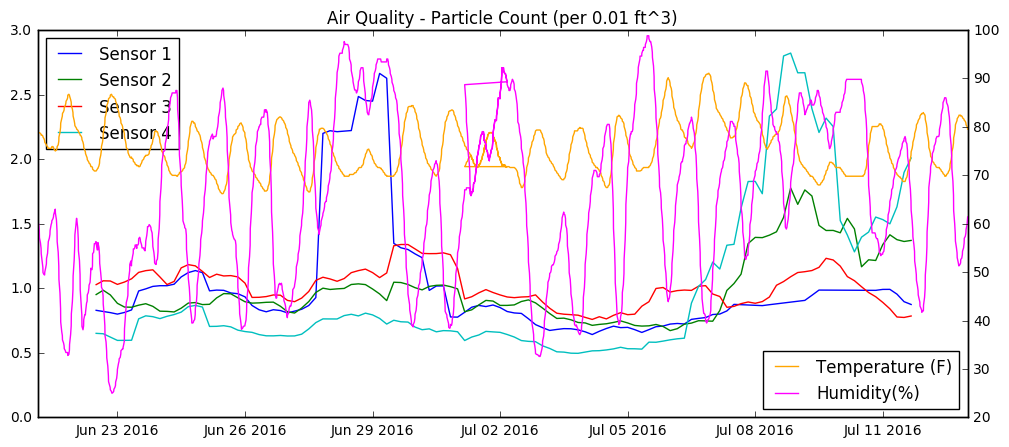

In [44]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(sensor_1.dt, sensor_1.con_rmean, label=('Sensor 1'))
ax1.plot(sensor_2.dt, sensor_2.con_rmean, label=('Sensor 2'))
ax1.plot(sensor_3.dt, sensor_3.con_rmean, label=('Sensor 3'))
ax1.plot(sensor_4.dt, sensor_4.con_rmean, label=('Sensor 4'))
ax1.legend(loc='best')
ax2.plot(weather.dt, weather.temp_rmean, c= "orange", label= ('Temperature (F)'))
ax2.plot(weather.dt, weather.hum_rmean, c="magenta", label=('Humidity(%)'))
plt.title('Air Quality - Particle Count (per 0.01 ft^3)')
plt.xticks(rotation=75, fontsize=10)
ax2.legend(loc='best')

### Figure 5: Temperature and Humidity in Brooklyn plotted against air quality (particle count per cubic foot) for sensors 1, 2, 3 and 4 located in Redhook.  
No real trends or patterns are apparent from this visualization.  However, one point of note occurs around June 28th, and July 8th.  Both periods have low daily temperature highs and also see peaks in particle counts (at sensor 1 in June, and in sensors 2 and 3 - the peak at sensor 4 slightly precedes the air temparature low).  

In [51]:
# Pearson's : samples need to be sorted, need to be the same size
def CorrTestPears (df):
    test_data = pd.merge(weather, df, on='dt', how='inner')
    if len(test_data.hum_rmean) == len(test_data.con_rmean):
        x = test_data.hum_rmean.sort_values()
        y = test_data.con_rmean.sort_values()
        stat1, pval1 = scipy.stats.pearsonr(x, y)
        if pval1 <= 0.05:
            result1 = 'Humidity and air quality: significant correlation'
        else:
            result1 = 'Humidty and air quality: not significant'
    if len(test_data.temp_rmean) == len(test_data.con_rmean):
        x = test_data.temp_rmean.sort_values()
        y = test_data.con_rmean.sort_values()
        stat2, pval2 = scipy.stats.pearsonr(x, y)
        if pval2 <= 0.05:
            result2 = 'Temperature and air quality: significant correlation'
        else:
            result2 = 'Temperature and air quality: not significant'
    return (result1, pval1, result2, pval2)

In [52]:
print ('Sensor 1: ', CorrTestPears(sensor_1))
print ('Sensor 2: ', CorrTestPears(sensor_2))
print ('Sensor 3: ', CorrTestPears(sensor_3))
print ('Sensor 4: ', CorrTestPears(sensor_4))

Sensor 1:  ('Humidty and air quality: not significant', 1.0, 'Temperature and air quality: not significant', 1.0)
Sensor 2:  ('Humidty and air quality: not significant', 1.0, 'Temperature and air quality: not significant', 1.0)
Sensor 3:  ('Humidty and air quality: not significant', 1.0, 'Temperature and air quality: not significant', 1.0)
Sensor 4:  ('Humidty and air quality: not significant', 1.0, 'Temperature and air quality: not significant', 1.0)


## Noise and 311 noise complaints and land use

In [78]:
noise = pd.read_csv('311_Service_Requests_from_2010_to_Present (1).csv')

In [79]:
noise.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [80]:
noise.drop(['Closed Date', 'Agency', 'Agency Name',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'], axis=1, inplace=True)

In [81]:
len(noise)

137

In [82]:
noise['Complaint Type'].value_counts()

Noise - Residential        47
Noise                      39
Noise - Street/Sidewalk    25
Noise - Commercial         20
Noise - Helicopter          3
Noise - Vehicle             2
Noise - Park                1
Name: Complaint Type, dtype: int64

In [83]:
noise.Descriptor.value_counts()

Loud Music/Party                                    65
Noise: Construction Before/After Hours (NM1)        23
Banging/Pounding                                    15
Loud Talking                                         7
Car/Truck Horn                                       5
Noise: air condition/ventilation equipment (NV1)     5
Noise: Jack Hammering (NC2)                          4
Noise: Alarms (NR3)                                  4
Other                                                3
Engine Idling                                        2
Noise: Manufacturing Noise (NK1)                     1
Noise, Ice Cream Truck (NR4)                         1
Car/Truck Music                                      1
Noise, Barking Dog (NR5)                             1
Name: Descriptor, dtype: int64

## Compare - noise and 311, noise and land use

In [85]:
# Code to convert latitude and longitude to geopandas geometry from 
# https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(noise.Longitude, noise.Latitude)]
noise =noise.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
geo_noise = GeoDataFrame(noise, crs=crs, geometry=geometry)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


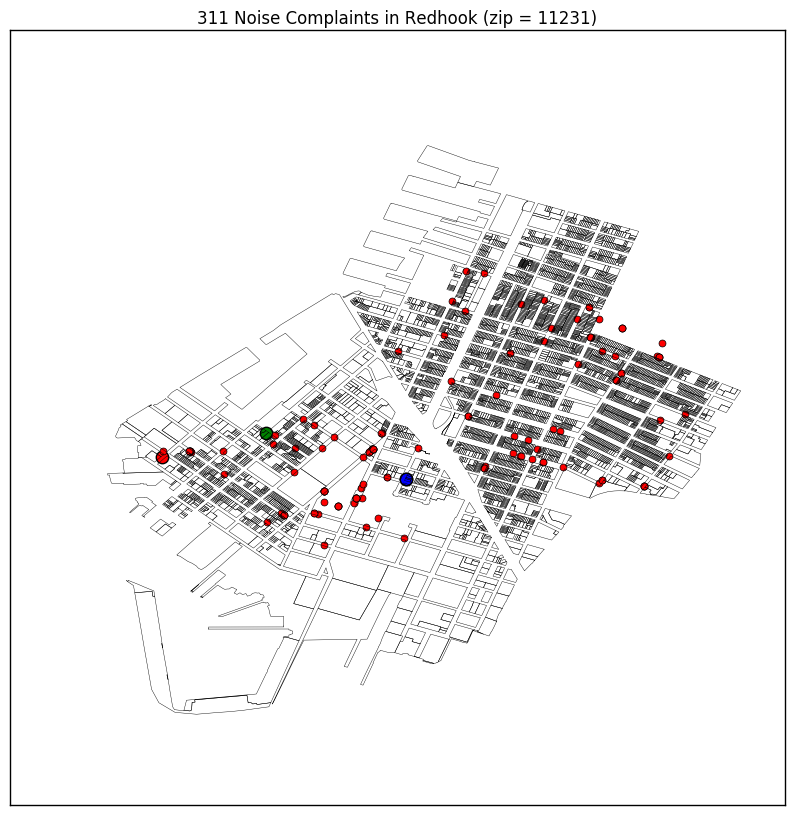

In [87]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
geo_noise.plot(alpha=1,linewidth=0.3,ax=ax, marker='o',markersize=5, color='red')
redhook.plot(alpha=0,linewidth=0.3,ax=ax, legend=True)
plt.title("311 Noise Complaints in Redhook (zip = 11231)")
ax.legend()
ax.scatter(sensor_0_pt.x, sensor_0_pt.y, s=80, c='blue', alpha=1, label='Sensor 1 (elevation = 8m)')
ax.scatter(sensor_2_pt.x, sensor_2_pt.y, s=80, c='red', alpha=1, label='Sensor 2 (ground level)')
ax.scatter(sensor_3_pt.x, sensor_3_pt.y, s=80, c='blue', alpha=1, label='Sensor 3 (street level)')
ax.scatter(sensor_4_pt.x, sensor_4_pt.y, s=80, c='green', alpha=1, label='Sensor 4 (elevation = 15m)')

### Figure 6: Noise complaints in Redhook, reported to 311 between June 21, 2016 and July 12, 2016.  
Sensors 1 and 3, denoted by the blue dot, detected the greatest amount of noise during the measurement period, compared to the other two sensors.  Sensor 1, located at street level, detected slightly higher noise levels than the sensor on the roof.  The map shows noise complains made to 311.  All three locations of the sensors appear to have an equal occurance of noise compaint calls. Although Sensors 1 and 3 (blue dot) have the fewest noise complaints located nearest to the sensors' location, those sensors are located only a block away from a busy road which does have a greater occurance of noise complaints.  The main street that sensors 2 (red dot) and 4 (green dot) are located nearest to is noticably more quiet, as shown by the fewer occurances of 311 calls.  The busy street that sensors 1 and 3 are located near could account for the greater noise measurements detected there.